In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


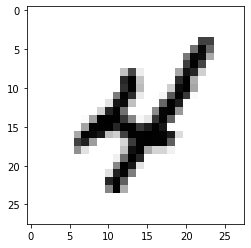

In [ ]:
digit = 9 
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

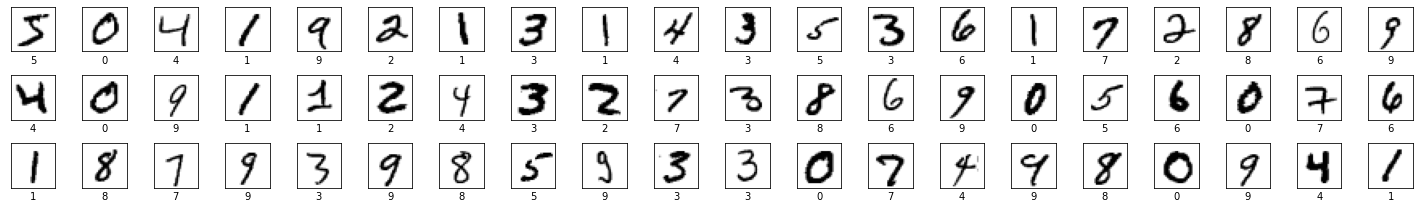

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0
#Without Normalization
x1_train = x_train.reshape(-1, 28,28,1)
x1_test = x_test.reshape(-1, 28,28,1)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x1_train: {x1_train.shape}")
print(f"Shape of x1_test: {x1_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of x1_train: (60000, 28, 28, 1)
Shape of x1_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


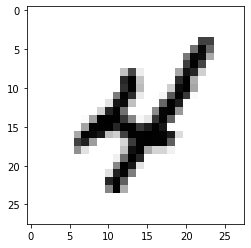

In [ ]:
digit = 9 
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    # layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='sgd',  
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 34s 8ms/step - loss: 0.6857 - accuracy: 0.8153 - val_loss: 0.3424 - val_accuracy: 0.9018
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3517 - accuracy: 0.8966 - val_loss: 0.3067 - val_accuracy: 0.9118
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3261 - accuracy: 0.9045 - val_loss: 0.3005 - val_accuracy: 0.9168
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.3111 - accuracy: 0.9104 - val_loss: 0.2807 - val_accuracy: 0.9217
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2986 - accuracy: 0.9145 - val_loss: 0.2791 - val_accuracy: 0.9186


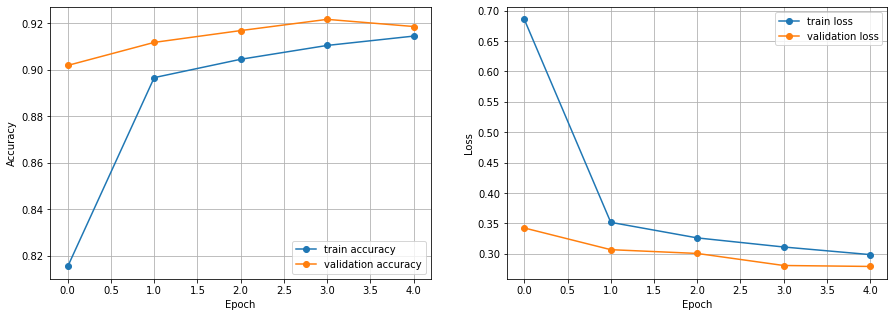

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
hNotNormal = model.fit(x=x1_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2884 - accuracy: 0.9167 - val_loss: 0.2675 - val_accuracy: 0.9232
Epoch 2/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2762 - accuracy: 0.9203 - val_loss: 0.2538 - val_accuracy: 0.9286
Epoch 3/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2630 - accuracy: 0.9247 - val_loss: 0.2435 - val_accuracy: 0.9302
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2484 - accuracy: 0.9291 - val_loss: 0.2240 - val_accuracy: 0.9384
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2301 - accuracy: 0.9354 - val_loss: 0.2073 - val_accuracy: 0.9435


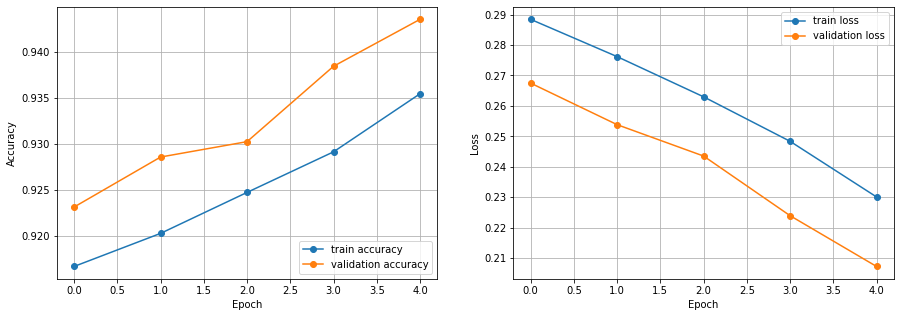

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hNotNormal.history['accuracy'], 'o-', label='train accuracy')
plt.plot(hNotNormal.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(hNotNormal.history['loss'], 'o-', label='train loss')
plt.plot(hNotNormal.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2045 - accuracy: 0.9410

Test accuracy: 0.9409999847412109


In [ ]:
predictions = model.predict(x_test)

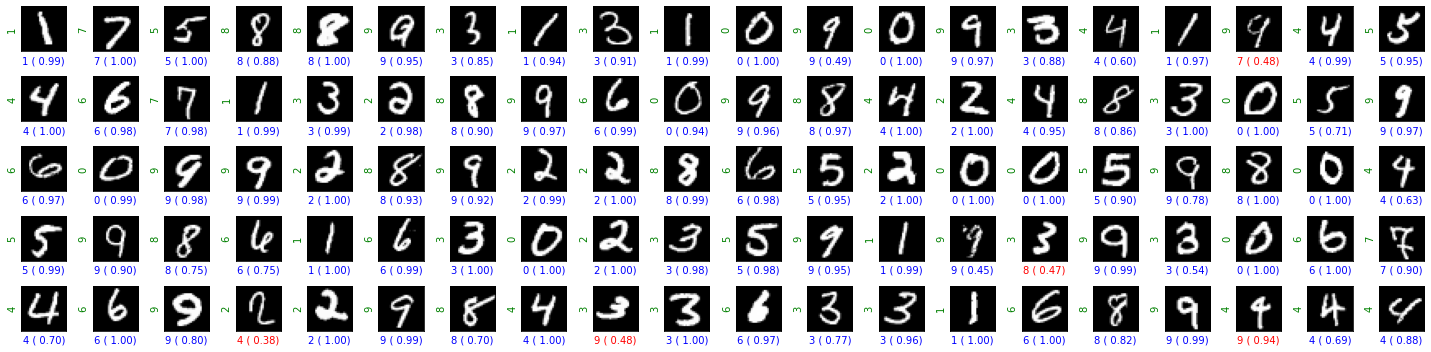

In [ ]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

With normalization model gives better accuracy than Without normalization.